🧬 💵 Let's read salary data for biotech careers from [this public spreadsheet](https://docs.google.com/spreadsheets/d/1G0FmJhkOME_sv66hWmhnZS5qR2KMTY7nzkxksv46bfk).

First, load the `googlesheets4` package.

In [1]:
library('googlesheets4')
library('tidyverse')
library ('scales')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
gs4_deauth()

In [3]:
biotech = read_sheet('https://docs.google.com/spreadsheets/d/1G0FmJhkOME_sv66hWmhnZS5qR2KMTY7nzkxksv46bfk/edit#gid=203339396')
biotech |> head()

✔ Reading from "salary survey test (Responses)".

✔ Range Form Responses 1.



Timestamp,Where are you located? (Country and/or nearest Major city or hubs names),Biotech sub industry?,[OPTIONAL] Company Name,Company Details - public/private/start-up/ subsidiary of,Approximate Company Size,Role / Title of current position,Highest achieved Formal Education,Years of Experience,Compensation - Annual Base Salary/Pay,Compensation - Annual Target Bonus ($),Compensation - Annual Equity,[OPTIONAL] Sign on Bonus Value,[OPTIONAL] Sign on - Relocation Assistance Total Value
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<list>,<list>,<dbl>,<list>
2022-05-08 00:17:11,test,Academia/Research,poop,Subsidiary,NA,pimp,High School or Equivalent,1,123,123,Not Applicable/None,123,12e
2022-05-08 00:38:17,Los Angeles,Consulting,NA,Private,50-200,Senior Manager,Masters or Equivalent,6,160000,16000,30000,10000,NULL
2022-05-08 00:39:38,San Diego,Pharmaceutical (including “big pharma”),NA,Public,50-200,Research Associate I,Bachelors or Equivalent,0,55000,4400,Not Applicable/None,NA,NULL
2022-05-08 00:40:46,Illinois,Academia/Research,NA,Academia/College/Universities,5000+,Researcher 1,Bachelors or Equivalent,2,28000,Not Applicable/None,Not Applicable/None,NA,NULL
2022-05-08 00:40:48,New Jersey,Pharmaceutical (including “big pharma”),Wuxi Biologics,Public,1000-5000,Manufacturing technician III,Bachelors or Equivalent,6,72800,5824,Not Applicable/None,NA,NULL
2022-05-08 00:42:01,Near boston,Pharmaceutical (including “big pharma”),Abbvie,Public,5000+,Senior scientist I,PhD or Equivalent,0,120000,0.08,Not Applicable/None,7000,15000


library('tidyverse')📈 Make a chart that shows the relationship between `Years of Experience` and `Compensation - Annual Base Salary/Pay`.

❗️ Remember that you need to use backticks to access columns whose names have spaces:

```
`Years of Experience`
```

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



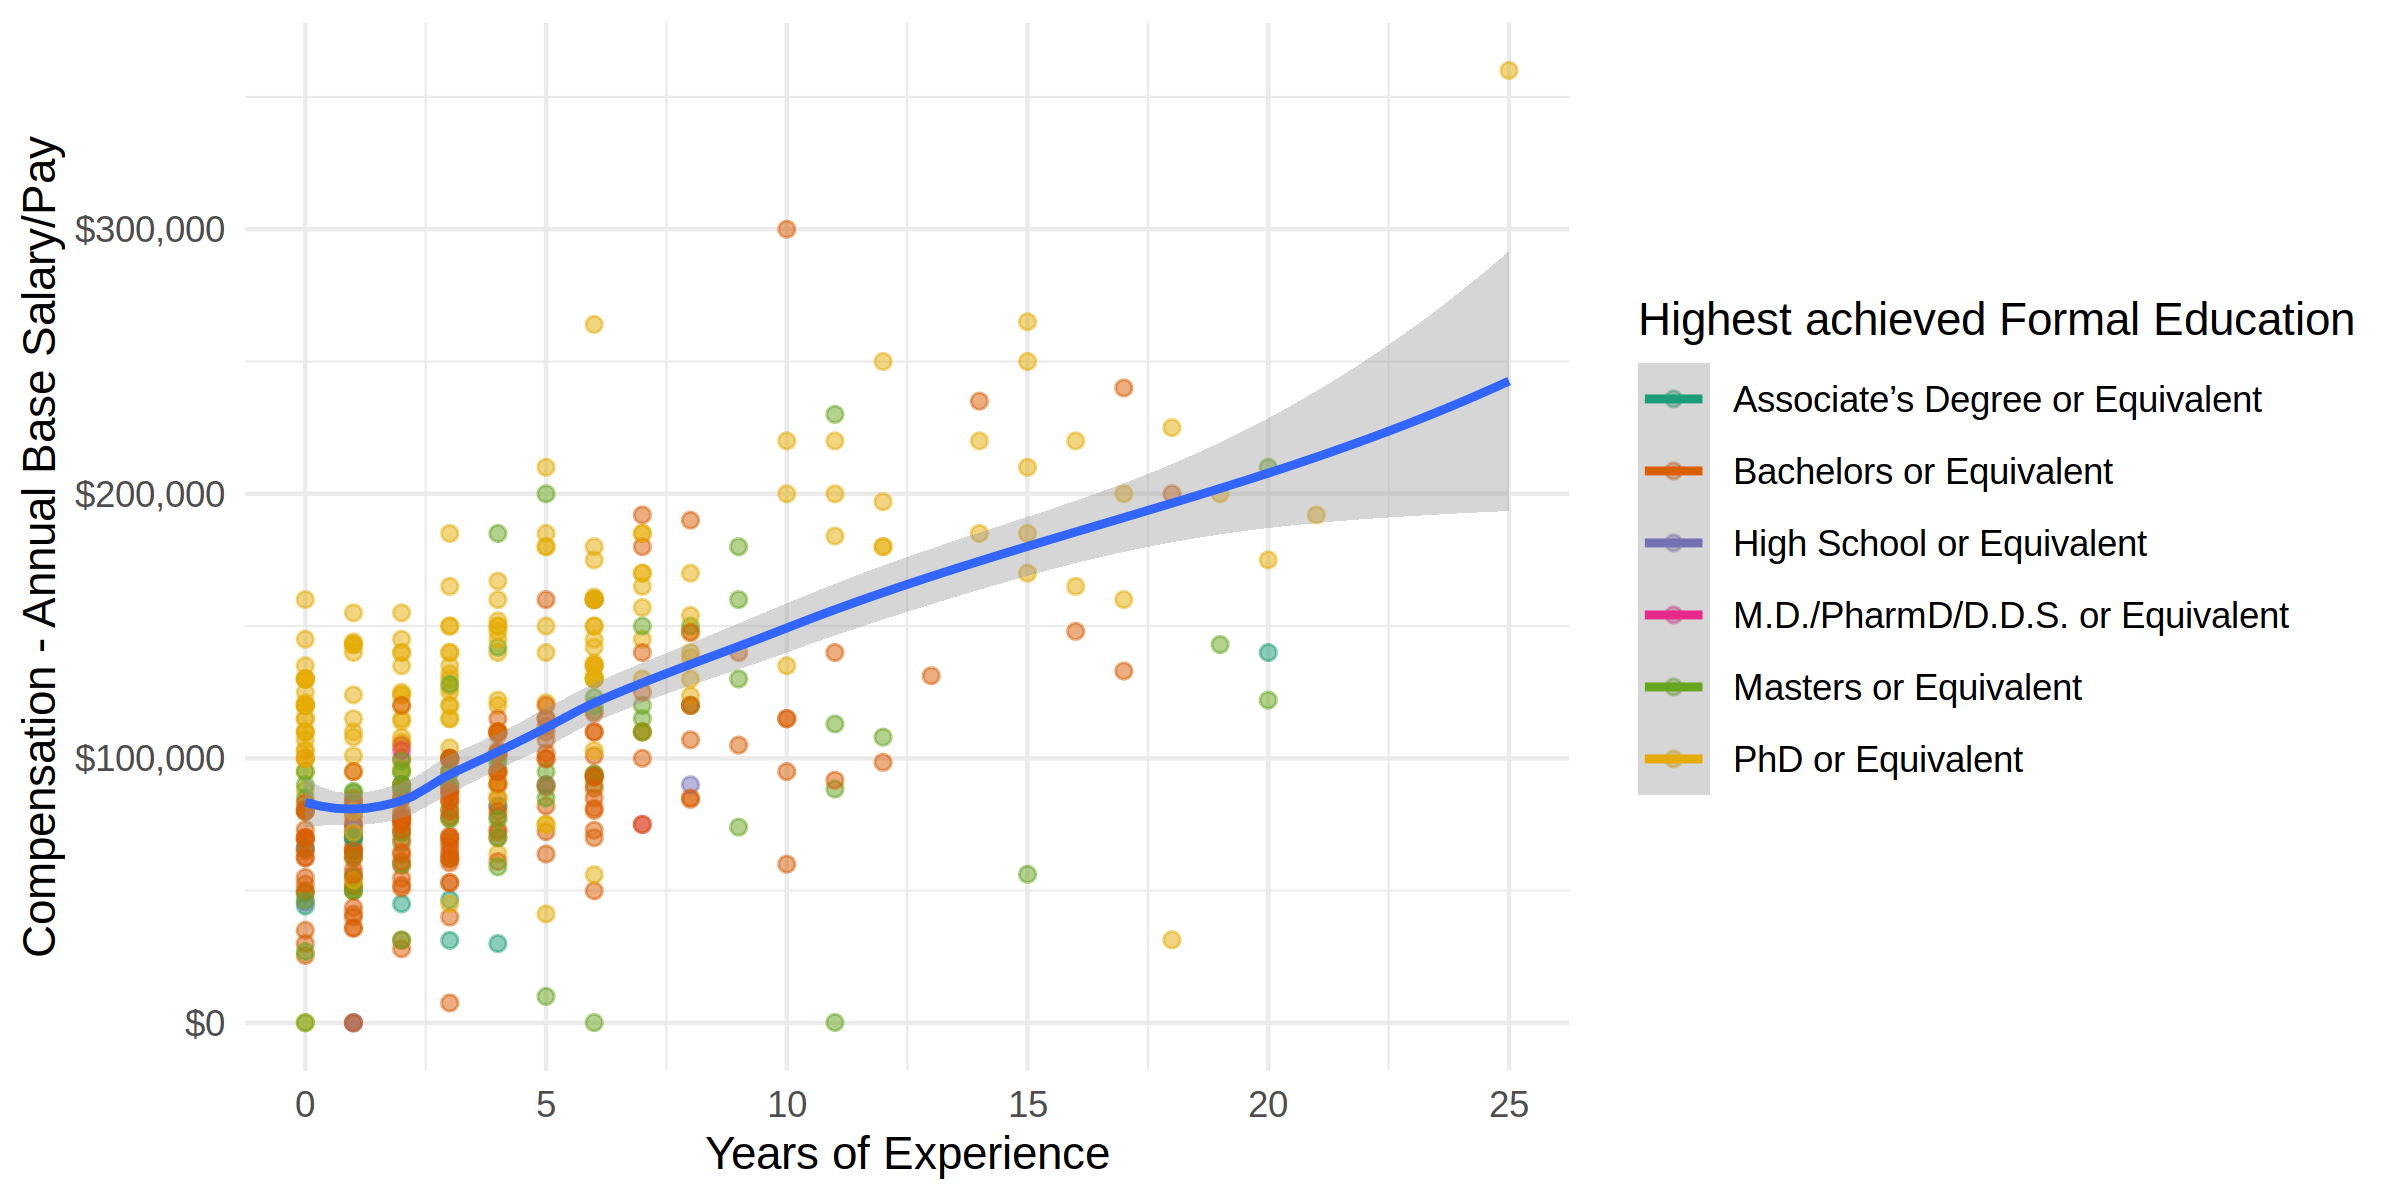

In [9]:
options (repr.plot.width = 8)
biotech |> 
ggplot(aes(x = `Years of Experience`, y = `Compensation - Annual Base Salary/Pay`, color = `Highest achieved Formal Education`)) +
    geom_point(alpha= 0.5) + 
    geom_smooth(aes(group=1)) + 
    theme_minimal() +
    scale_color_brewer(palette='Dark2') + 
    scale_y_continuous(labels = scales::dollar_format())

📊 Count the number of respondents that belong to each `Highest achieved Formal Education` category. You can do this visually with `geom_bar` or in table form with `dplyr`...

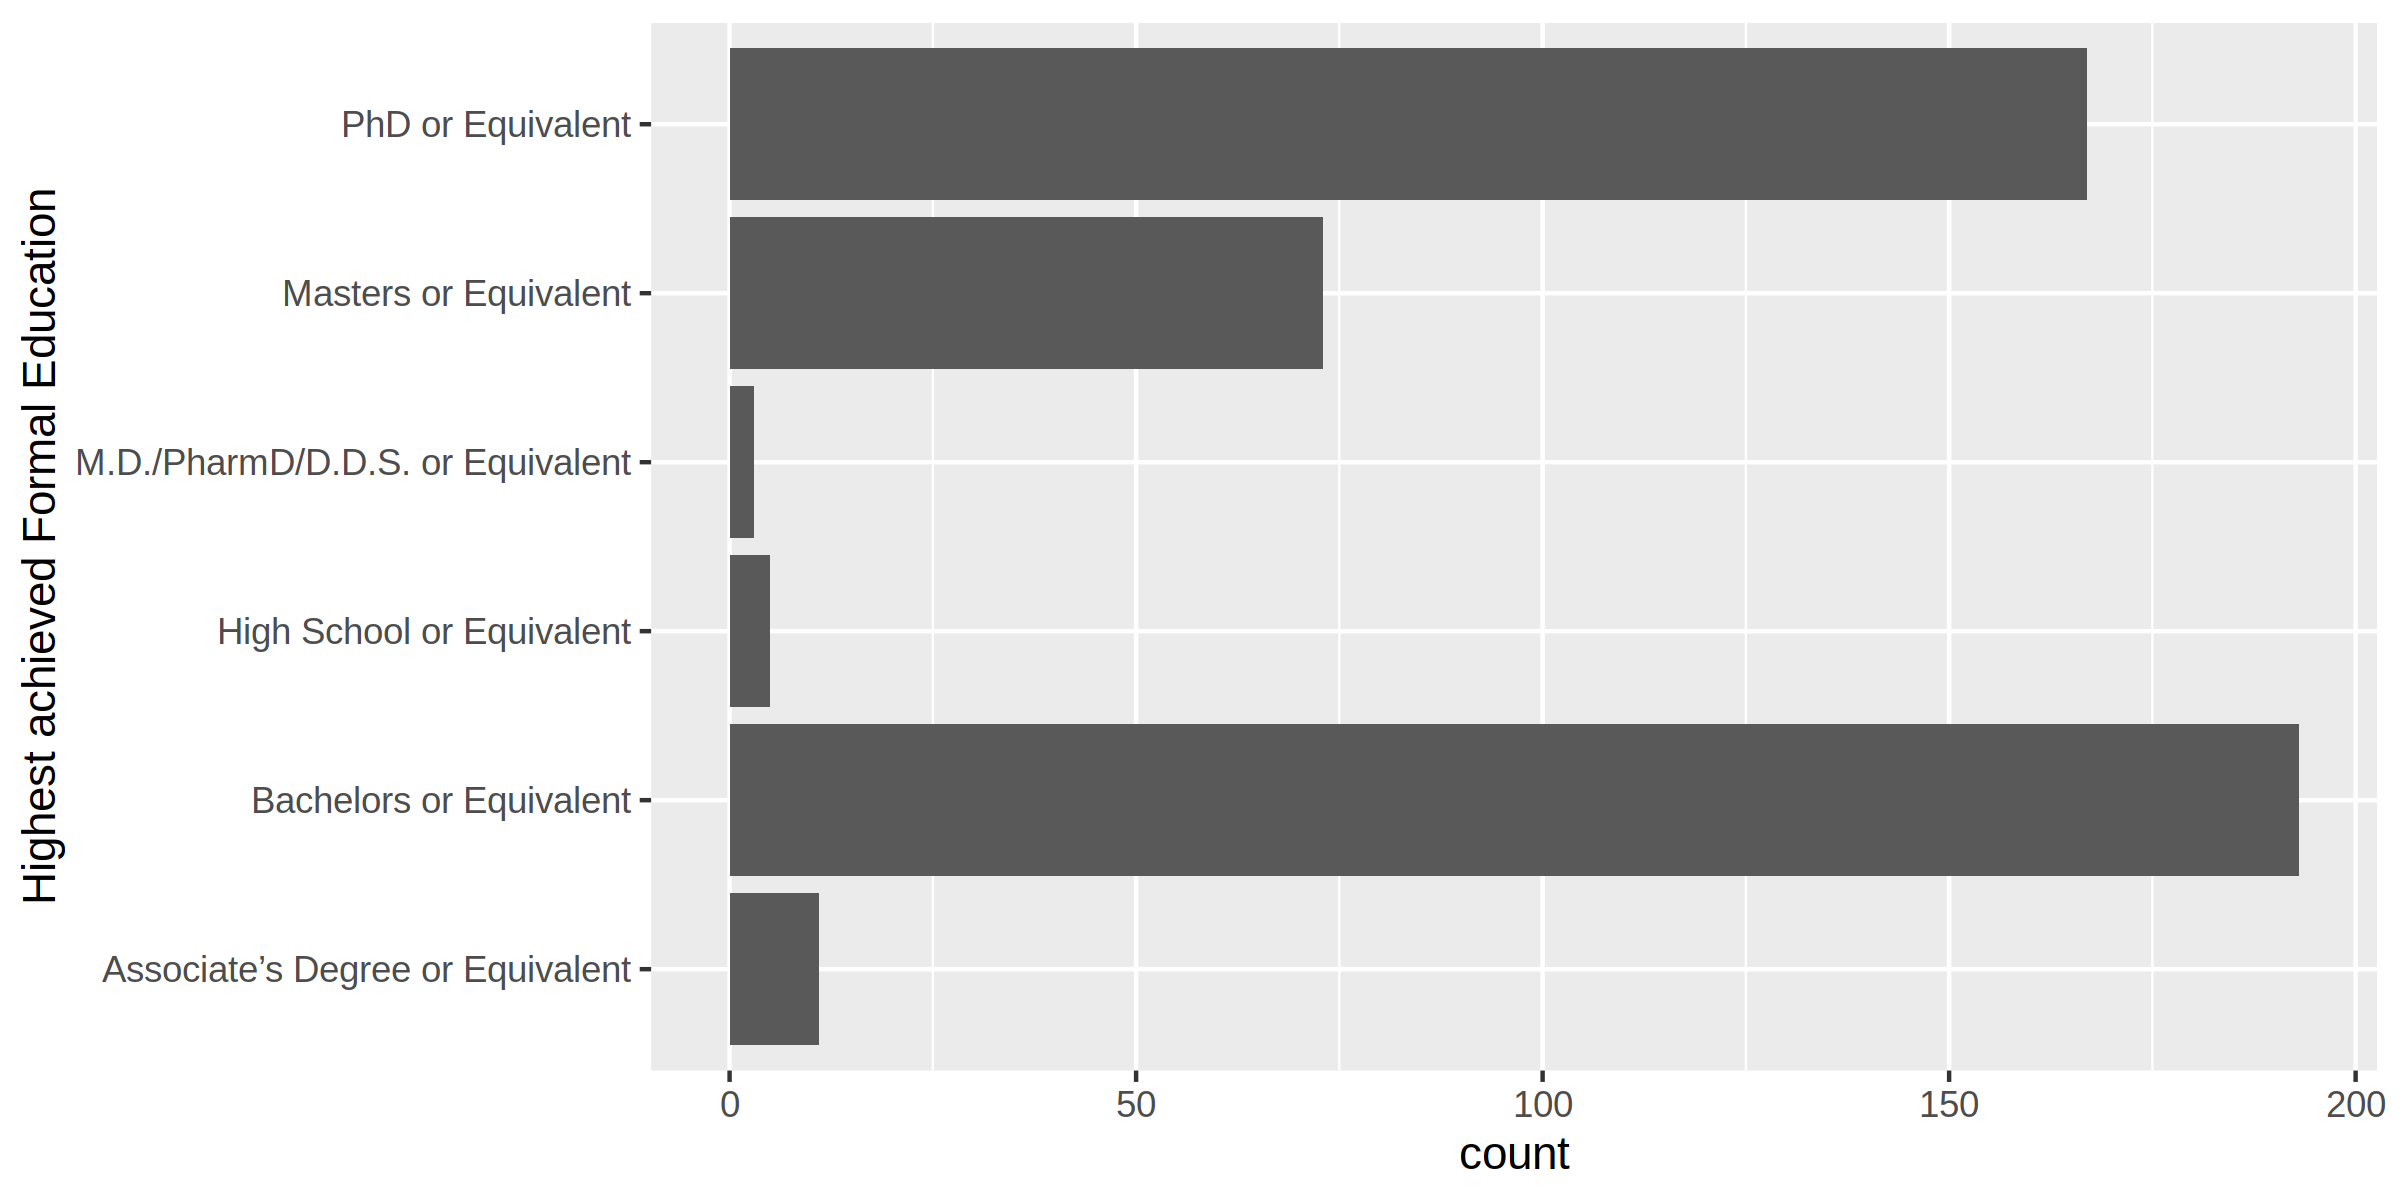

In [13]:
p = ggplot(biotech, aes(y=`Highest achieved Formal Education`)) +
    geom_bar() 
    
p

In [15]:
education = biotech |> 
    group_by(`Highest achieved Formal Education`) |> 
    summarize(n_respondents = n())
education |> head()

Highest achieved Formal Education,n_respondents
<chr>,<int>
Associate’s Degree or Equivalent,11
Bachelors or Equivalent,193
High School or Equivalent,5
M.D./PharmD/D.D.S. or Equivalent,3
Masters or Equivalent,73
PhD or Equivalent,167


📊 Make a histogram of `Compensation - Annual Base Salary/Pay` for respondents in the `Bachelors or Equivalent` group from the `Highest achieved Formal Education` column.,

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



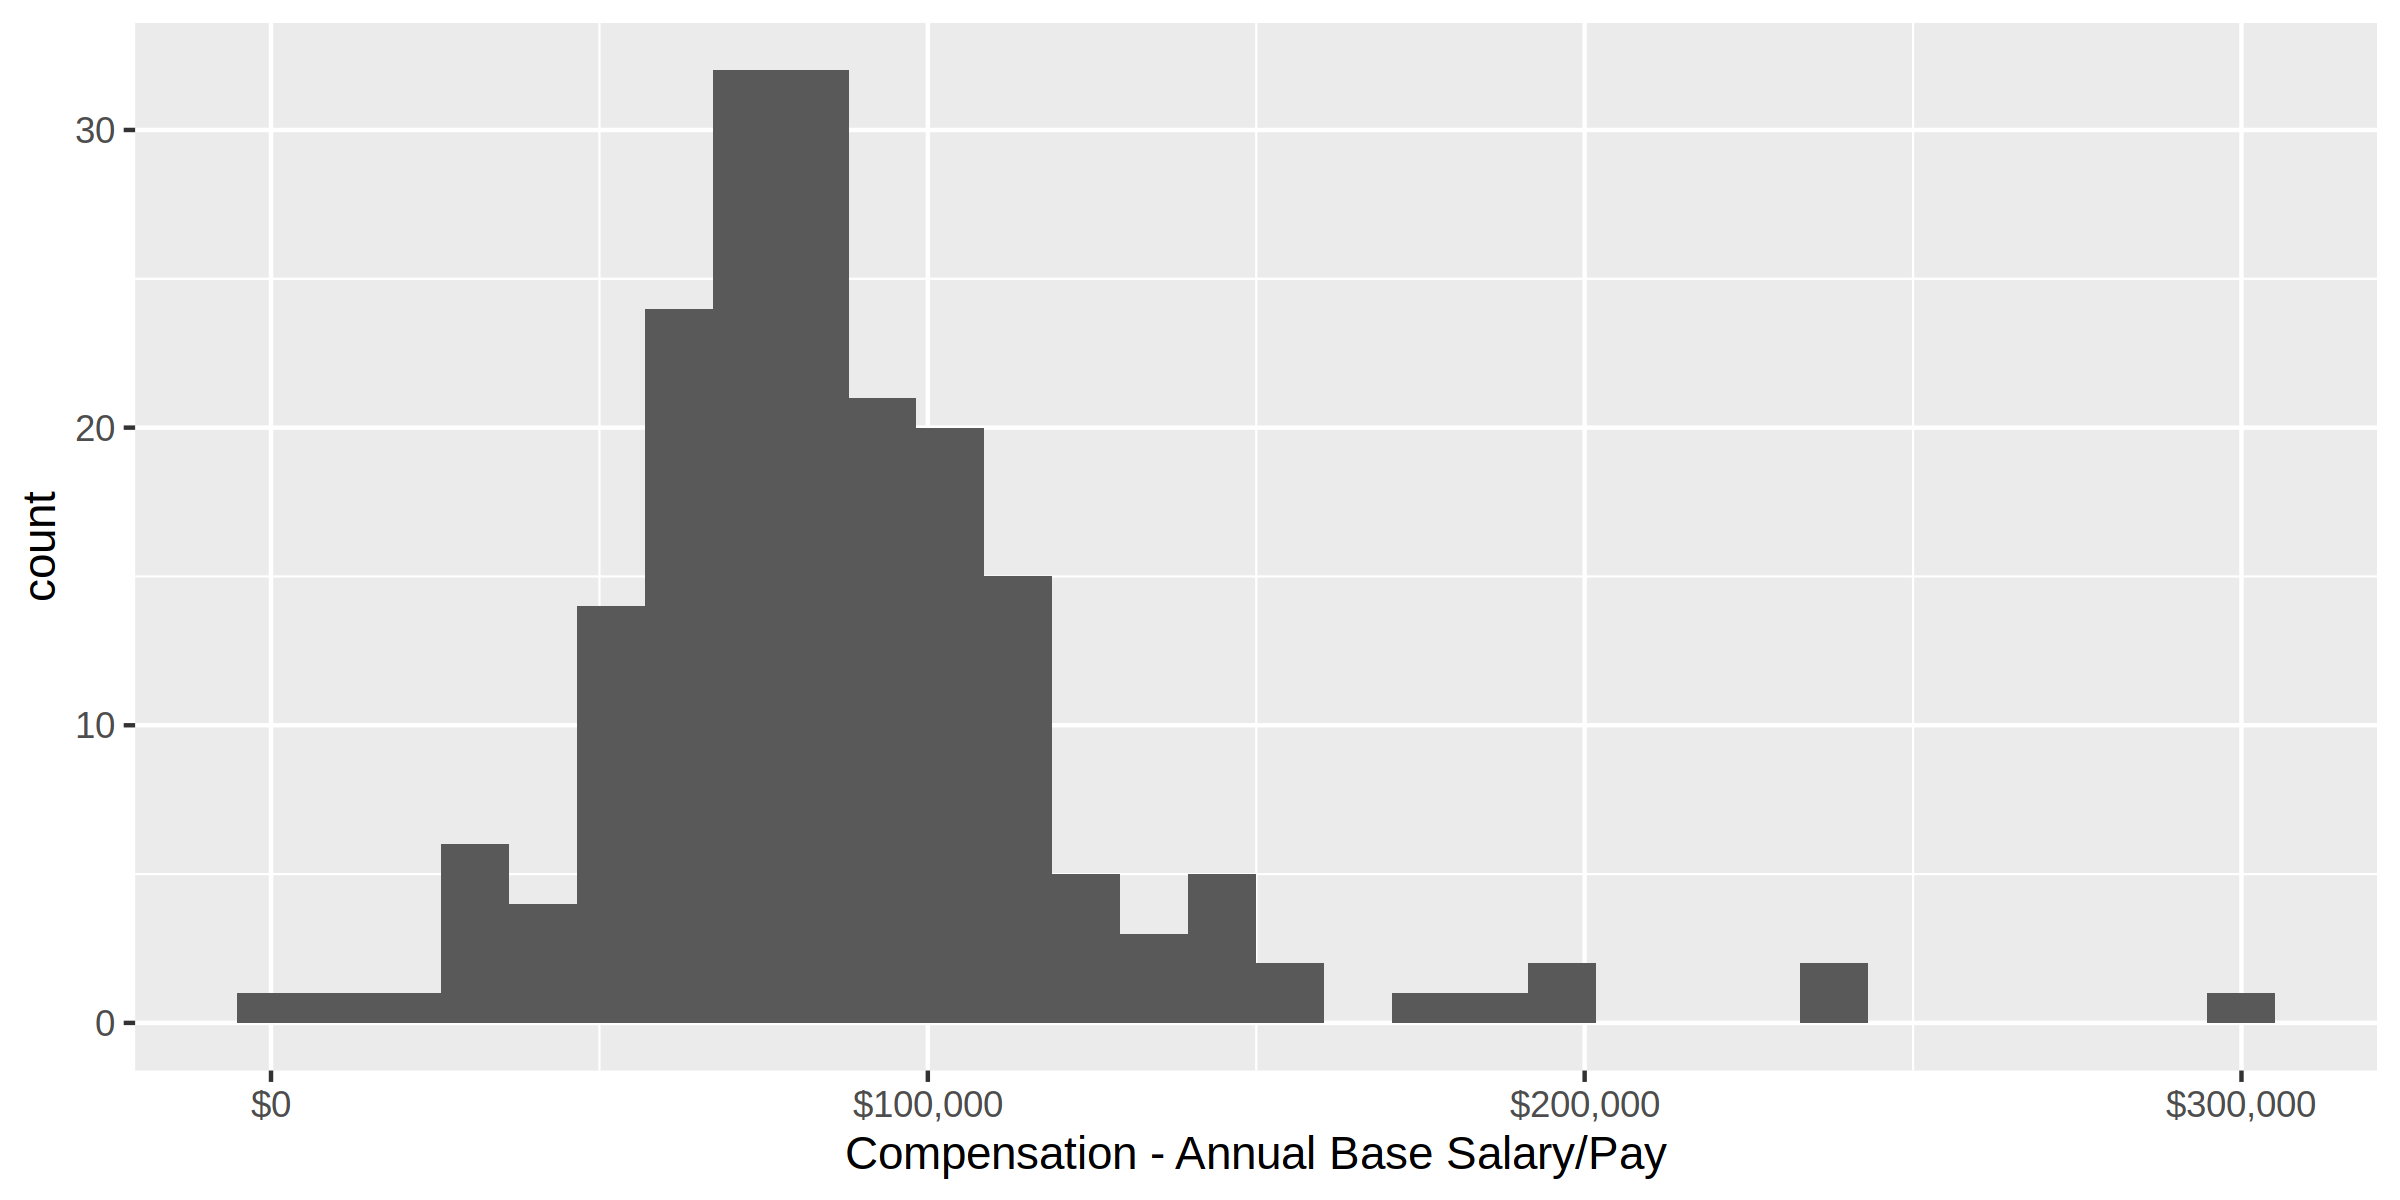

In [16]:
salary_data_bs = biotech |> 
    filter(`Highest achieved Formal Education`== 'Bachelors or Equivalent')
    
p = ggplot(salary_data_bs, aes(x = `Compensation - Annual Base Salary/Pay`))+ 
geom_histogram() + scale_x_continuous(labels = scales::dollar_format())

p

In [17]:
salary_data_bs |> filter(`Compensation - Annual Base Salary/Pay` < 1000)

Timestamp,Where are you located? (Country and/or nearest Major city or hubs names),Biotech sub industry?,[OPTIONAL] Company Name,Company Details - public/private/start-up/ subsidiary of,Approximate Company Size,Role / Title of current position,Highest achieved Formal Education,Years of Experience,Compensation - Annual Base Salary/Pay,Compensation - Annual Target Bonus ($),Compensation - Annual Equity,[OPTIONAL] Sign on Bonus Value,[OPTIONAL] Sign on - Relocation Assistance Total Value
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<list>,<list>,<dbl>,<list>
2022-05-09 15:07:26,"Salt Lake City, UT",Pharmaceutical (including “big pharma”),BIOMERIEUX,Public,5000+,Associate Scientist,Bachelors or Equivalent,1,28.37,2360,Not Applicable/None,NA,NULL
